In [11]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [12]:
inputs = df.drop('salary_more_then_100k',axis=1)

In [13]:
target = df['salary_more_then_100k']

In [8]:
from sklearn.preprocessing import LabelEncoder
le_comp = LabelEncoder()
le_job = LabelEncoder()
le_deg = LabelEncoder()

In [14]:
inputs['company'] = le_comp.fit_transform(inputs['company'])
inputs['job'] = le_comp.fit_transform(inputs['job'])
inputs['degree'] = le_comp.fit_transform(inputs['degree'])

In [15]:
inputs

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [21]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.33, random_state=42)

In [33]:
X_test

,company,job,degree
0,2,2,0
1,2,2,1
5,2,1,1
14,1,1,0
13,1,0,1
11,1,2,1


In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [30]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
model.score(X_test,y_test)

0.8333333333333334

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, 1, 1, 1], dtype=int64)

In [36]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2, 0],
       [1, 3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

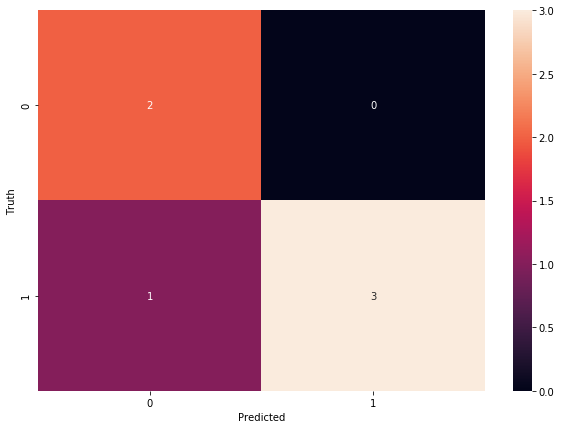

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')